# Training a Decision Tree for Simple Regression Problem

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import graphviz

sns.set()

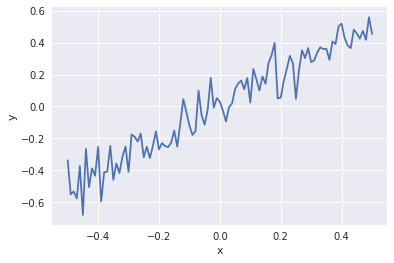

In [2]:
# Build a simple data set with y = x + random
n_points = 100

# x values for plotting
x_plot = [(float(i)/float(n_points) - 0.5) for i in range(n_points + 1)]

# x needs to be list of lists
x = [[s] for s in x_plot]

# y (labels) has random noise added to x value
# set seed
np.random.seed(1)
y = [s + np.random.normal(scale=0.1) for s in x_plot]

plt.plot(x_plot, y)
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
simple_tree = DecisionTreeRegressor(max_depth=1)
simple_tree.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

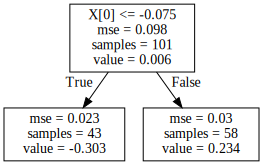

In [10]:
graphviz.Source(tree.export_graphviz(simple_tree, out_file=None))

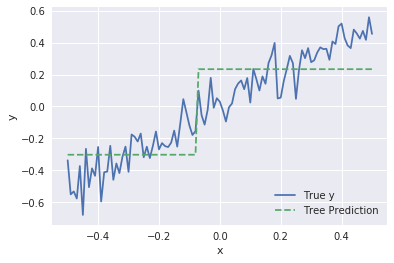

In [15]:
y_hat = simple_tree.predict(x)

plt.figure()
plt.plot(x_plot, y, label='True y')
plt.plot(x_plot, y_hat, label='Tree Prediction', linestyle='--')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

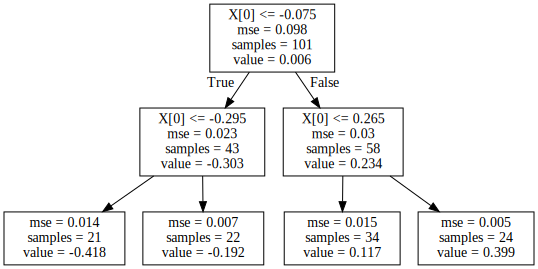

In [16]:
simple_tree2 = DecisionTreeRegressor(max_depth=2)
simple_tree2.fit(x, y)

# draw the tree
graphviz.Source(tree.export_graphviz(simple_tree2, out_file=None))

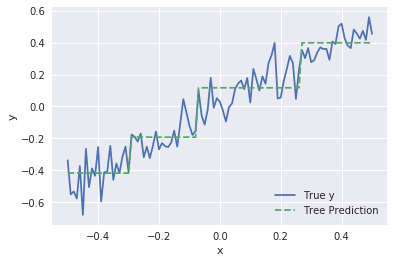

In [18]:
# compare the prediction from tree with true values
y_hat = simple_tree2.predict(x)

plt.figure()
plt.plot(x_plot, y, label='True y')
plt.plot(x_plot, y_hat, label='Tree Prediction', linestyle='--')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
# split point calculations - try every possible split point to find the best one
sse = []
x_min = []

for i in range(1, len(x_plot)):
    # divide list into points on left and right of split point
    lh_list = list(x_plot[0:i])
    rh_list = list(x_plot[i:len(x_plot)])
    
    # calculate averages on each side
    lh_avg = sum(lh_list)/len(lh_list)
    rh_avg = sum(rh_list)/len(rh_list)
    
    # calculate sum square error on left, right, and total
    lh_sse = sum([(s - lh_avg) * (s - lh_avg) for s in lh_list])
    rh_sse = sum([(s - rh_avg) * (s - rh_avg) for s in rh_list])
    
    # add sum of left and right to list of errors
    sse.append(lh_sse + rh_sse)
    x_min.append(max(lh_list))

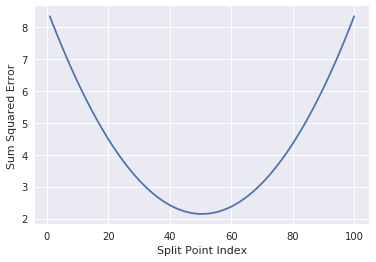

In [20]:
plt.plot(range(1, len(x_plot)), sse)
plt.xlabel('Split Point Index')
plt.ylabel('Sum Squared Error')
plt.show()

In [21]:
min_sse = min(sse)
idx_min = sse.index(min_sse)
print(x_min[idx_min])

-0.010000000000000009


In [22]:
# what happens if the depth is erally high
simple_tree6 = DecisionTreeRegressor(max_depth=6)
simple_tree6.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

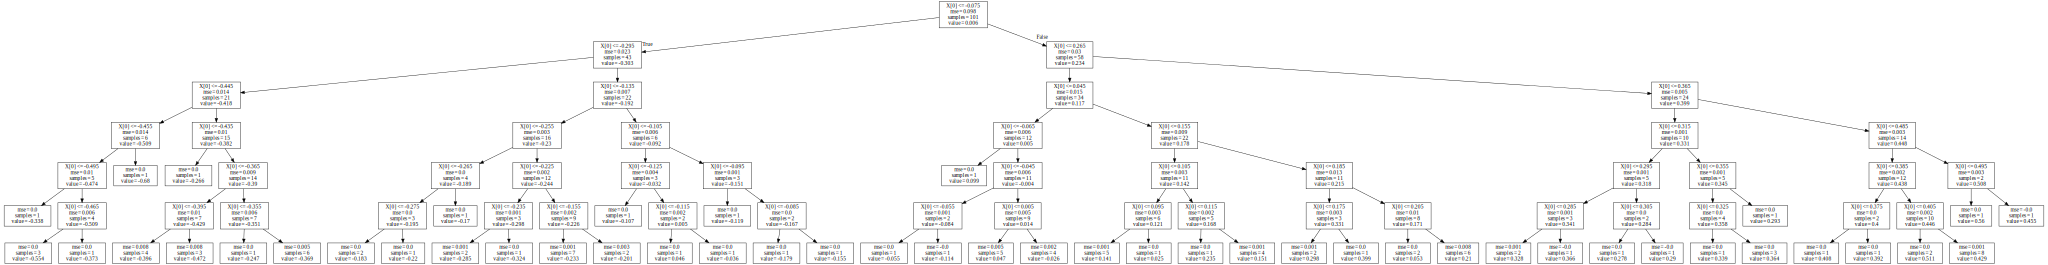

In [23]:
graphviz.Source(tree.export_graphviz(simple_tree6, out_file=None))

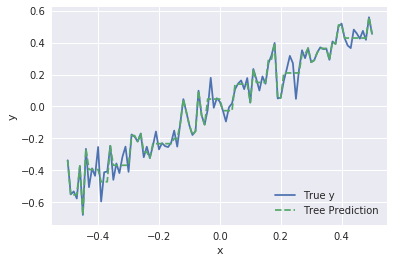

In [24]:
# compare prediction from tree with true values
# compare the prediction from tree with true values
y_hat = simple_tree6.predict(x)

plt.figure()
plt.plot(x_plot, y, label='True y')
plt.plot(x_plot, y_hat, label='Tree Prediction', linestyle='--')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.show()